In [57]:
import numpy as np
from scipy import stats
import scipy
import warnings
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#from stemgraphic import stem_graphic
from scipy import stats
from scipy.ndimage import mean, median, variance
warnings.simplefilter('ignore', DeprecationWarning)

# LOADING OF DATASET

In [2]:
df1 = pd.read_csv('India.csv')
df1.head(20)

,date,confirmed,vaccines,people_vaccinated,people_fully_vaccinated,school_closing,workplace_closing,cancel_events,gatherings_restrictions,transport_closing,stay_home_restrictions,internal_movement_restrictions,international_movement_restrictions,information_campaigns,contact_tracing,facial_coverings
0,22-01-2020,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,23-01-2020,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,24-01-2020,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,25-01-2020,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,26-01-2020,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,1.0,1.0,1.0,0.0
5,27-01-2020,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,1.0,1.0,1.0,0.0
6,28-01-2020,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,1.0,1.0,1.0,0.0
7,29-01-2020,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,1.0,1.0,1.0,0.0
8,30-01-2020,1.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,1.0,1.0,1.0,0.0
9,31-01-2020,1.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,1.0,1.0,2.0,0.0


# HANDLING OF MISSING DATA IF ANY

In [3]:
#Checking if we null values here or not using isnull() and then summing up of all 
#the null values together so we can have the count of null values eah column containing

df1.isnull().sum()

date                                     0
confirmed                                8
vaccines                                 0
people_vaccinated                      371
people_fully_vaccinated                400
school_closing                           6
workplace_closing                       10
cancel_events                           10
gatherings_restrictions                  6
transport_closing                       10
stay_home_restrictions                  10
internal_movement_restrictions          10
international_movement_restrictions     10
information_campaigns                   10
contact_tracing                         10
facial_coverings                        10
dtype: int64

In [4]:
#info() can also be used to check the information related to dataset like  null n non null counts , datatypes.
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 779 entries, 0 to 778
Data columns (total 16 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   date                                 779 non-null    object 
 1   confirmed                            771 non-null    float64
 2   vaccines                             779 non-null    float64
 3   people_vaccinated                    408 non-null    float64
 4   people_fully_vaccinated              379 non-null    float64
 5   school_closing                       773 non-null    float64
 6   workplace_closing                    769 non-null    float64
 7   cancel_events                        769 non-null    float64
 8   gatherings_restrictions              773 non-null    float64
 9   transport_closing                    769 non-null    float64
 10  stay_home_restrictions               769 non-null    float64
 11  internal_movement_restrictions  

## Filling the NAN values by taking mean of column and then replacing it with mean .

In [5]:
#Mean 
confirmed_col = df1['confirmed'].mean()
print(confirmed_col)

people_vaccinated_col = df1['people_vaccinated'].mean()
print(people_vaccinated_col)

people_fully_vaccinated_col = df1['people_fully_vaccinated'].mean()
print(people_fully_vaccinated_col)

school_closing_col = df1['school_closing'].mean()
print(school_closing_col)

workplace_closing_col = df1['workplace_closing'].mean()
print(workplace_closing_col)

cancel_events_col = df1['cancel_events'].mean()
print(cancel_events_col)

gatherings_restrictions_col = df1['gatherings_restrictions'].mean()
print(gatherings_restrictions_col)

transport_closing_col = df1['transport_closing'].mean()
print(transport_closing_col)

stay_home_restrictions_col = df1['stay_home_restrictions'].mean()
print(stay_home_restrictions_col)

internal_movement_restrictions_col = df1['internal_movement_restrictions'].mean()
print(internal_movement_restrictions_col)

international_movement_restrictions_col = df1['international_movement_restrictions'].mean()
print(international_movement_restrictions_col)

information_campaigns_col = df1['information_campaigns'].mean()
print(information_campaigns_col)

contact_tracing_col = df1['contact_tracing'].mean()
print(contact_tracing_col)

facial_coverings_col = df1['facial_coverings'].mean()
print(facial_coverings_col)

16977526.033722438
456708110.8186275
263995481.6701847
-0.869340232858991
-1.8023407022106632
-0.4798439531859558
-2.7891332470892625
-0.682704811443433
-1.5747724317295189
-0.9050715214564369
2.962288686605982
1.9401820546163848
1.433029908972692
0.4187256176853056


# Replace missing values with mean of the particular columns

In [26]:
df1.confirmed.fillna(confirmed_col,inplace=True)
#df1.confirmed.astype(int)


In [27]:
df1.people_vaccinated.fillna(people_vaccinated_col,inplace=True)
#df1.people_vaccinated.astype(int)

In [28]:
df1.people_fully_vaccinated.fillna(people_fully_vaccinated_col,inplace=True)
#df1.people_fully_vaccinated.astype(int)

In [29]:
df1.school_closing.fillna(school_closing_col,inplace=True)
#df1.school_closing.astype(int)

In [30]:
df1.workplace_closing.fillna(workplace_closing_col,inplace=True)
#df1.workplace_closing.astype(int)


In [31]:
df1.cancel_events.fillna(cancel_events_col,inplace=True)
#df1.cancel_events.astype(int)


In [32]:
df1.gatherings_restrictions.fillna(gatherings_restrictions_col,inplace=True)
#df1.gatherings_restrictions.astype(int)

In [33]:
df1.transport_closing.fillna(transport_closing_col,inplace=True)
#df1.transport_closing.astype(int)


In [34]:
df1.stay_home_restrictions.fillna(stay_home_restrictions_col,inplace=True)
#df1.stay_home_restrictions.astype(int)


In [35]:
df1.internal_movement_restrictions.fillna(internal_movement_restrictions_col,inplace=True)
#df1.internal_movement_restrictions.astype(int)

In [36]:
df1.international_movement_restrictions.fillna(international_movement_restrictions_col,inplace=True)
#df1.international_movement_restrictions.astype(int)

In [37]:
df1.information_campaigns.fillna(information_campaigns_col,inplace=True)
#df1.information_campaigns.astype(int)

In [38]:
df1.contact_tracing.fillna(contact_tracing_col,inplace=True)
#df1.contact_tracing.astype(int)

In [39]:
df1.facial_coverings.fillna(facial_coverings_col,inplace=True)
#df1.facial_coverings.astype(int)

### After filling the null values with mean checking if still we have the null values or not ?

In [40]:
df1.isnull().sum()

date                                   0
confirmed                              0
vaccines                               0
people_vaccinated                      0
people_fully_vaccinated                0
school_closing                         0
workplace_closing                      0
cancel_events                          0
gatherings_restrictions                0
transport_closing                      0
stay_home_restrictions                 0
internal_movement_restrictions         0
international_movement_restrictions    0
information_campaigns                  0
contact_tracing                        0
facial_coverings                       0
dtype: int64

In [41]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 779 entries, 0 to 778
Data columns (total 16 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   date                                 779 non-null    object 
 1   confirmed                            779 non-null    float64
 2   vaccines                             779 non-null    float64
 3   people_vaccinated                    779 non-null    float64
 4   people_fully_vaccinated              779 non-null    float64
 5   school_closing                       779 non-null    float64
 6   workplace_closing                    779 non-null    float64
 7   cancel_events                        779 non-null    float64
 8   gatherings_restrictions              779 non-null    float64
 9   transport_closing                    779 non-null    float64
 10  stay_home_restrictions               779 non-null    float64
 11  internal_movement_restrictions  

# EDA

In [ ]:
Step 1: Need to find the relationship between daily covid cases and lockdown saftery measures

# Relation between confirmed cases and lockdown effective measures columns

### 1. between Confirmed & no of people  vaccinated 

In [98]:
correlation_matrix = df1.corr()
correlation_coefficient = correlation_matrix.loc['confirmed', 'people_vaccinated']
round(correlation_coefficient,2)

C:\Users\Hp\AppData\Local\Temp\ipykernel_9476\3940924405.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df1.corr()


0.46

### 2. between Confirmed & no of people fully vaccinated 

In [100]:
correlation_matrix = df1.corr()
correlation_coefficient = correlation_matrix.loc['confirmed', 'people_fully_vaccinated']
round(correlation_coefficient,2)

C:\Users\Hp\AppData\Local\Temp\ipykernel_9476\2276218284.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df1.corr()


0.35

#### 3. Between school closing and confirmed cases

In [101]:
correlation_matrix = df1.corr()
correlation_coefficient = correlation_matrix.loc['confirmed', 'school_closing']
round(correlation_coefficient,2)

C:\Users\Hp\AppData\Local\Temp\ipykernel_9476\1276816642.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df1.corr()


-0.56

### 4. Between confirmed cases and workplace closing

In [102]:
correlation_matrix = df1.corr()
correlation_coefficient = correlation_matrix.loc['confirmed', 'workplace_closing']
round(correlation_coefficient,2)

C:\Users\Hp\AppData\Local\Temp\ipykernel_9476\3446017238.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df1.corr()


-0.19

### 5. Between confirmed cases and cancel events

In [103]:
correlation_matrix = df1.corr()
correlation_coefficient = correlation_matrix.loc['confirmed', 'cancel_events']
round(correlation_coefficient,2)

C:\Users\Hp\AppData\Local\Temp\ipykernel_9476\3666964644.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df1.corr()


-0.65

### 6. Between confirmed cases and gathering restrictions

In [105]:
correlation_matrix = df1.corr()
correlation_coefficient = correlation_matrix.loc['confirmed', 'gatherings_restrictions']
round(correlation_coefficient,2)

C:\Users\Hp\AppData\Local\Temp\ipykernel_9476\3608404648.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df1.corr()


-0.16

### 7. Between confirmed and transport_closing

In [106]:
correlation_matrix = df1.corr()
correlation_coefficient = correlation_matrix.loc['confirmed', 'transport_closing']
round(correlation_coefficient,2)

C:\Users\Hp\AppData\Local\Temp\ipykernel_9476\1662367481.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df1.corr()


-0.3

### 8. Between confirmed and stay_home_restrictions

In [107]:
correlation_matrix = df1.corr()
correlation_coefficient = correlation_matrix.loc['confirmed', 'stay_home_restrictions']
round(correlation_coefficient,2)

C:\Users\Hp\AppData\Local\Temp\ipykernel_9476\96598974.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df1.corr()


-0.47

### 9. Between confirmed cases and internal_movement_restrictions

In [109]:
correlation_matrix = df1.corr()
correlation_coefficient = correlation_matrix.loc['confirmed', 'internal_movement_restrictions']
round(correlation_coefficient,2)

C:\Users\Hp\AppData\Local\Temp\ipykernel_9476\2381475606.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df1.corr()


-0.13

### 10. Between confirmed cases and international_movement_restrictions

In [110]:
correlation_matrix = df1.corr()
correlation_coefficient = correlation_matrix.loc['confirmed', 'international_movement_restrictions']
round(correlation_coefficient,2)

C:\Users\Hp\AppData\Local\Temp\ipykernel_9476\1470026105.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df1.corr()


-0.46

### 11. Between confirmed cases and information_campaigns

In [111]:
correlation_matrix = df1.corr()
correlation_coefficient = correlation_matrix.loc['confirmed', 'information_campaigns']
round(correlation_coefficient,2)

C:\Users\Hp\AppData\Local\Temp\ipykernel_9476\3310725122.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df1.corr()


0.2

### 12. Between confirmed cases and contact_tracing

In [112]:
correlation_matrix = df1.corr()
correlation_coefficient = correlation_matrix.loc['confirmed', 'contact_tracing']
round(correlation_coefficient,2)

C:\Users\Hp\AppData\Local\Temp\ipykernel_9476\2684404732.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df1.corr()


-0.58

### 13. Between confirmed cases and facial_coverings 

In [113]:
correlation_matrix = df1.corr()
correlation_coefficient = correlation_matrix.loc['confirmed', 'facial_coverings']
round(correlation_coefficient,2)

C:\Users\Hp\AppData\Local\Temp\ipykernel_9476\4207694778.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df1.corr()


0.73

# 14. Between confirmed cases and vaccines

In [120]:
correlation_matrix = df1.corr()
correlation_coefficient = correlation_matrix.loc['confirmed', 'vaccines']
round(correlation_coefficient,2)

C:\Users\Hp\AppData\Local\Temp\ipykernel_9476\2401008608.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df1.corr()


nan

# Plotting HEATMAP for representing visualization

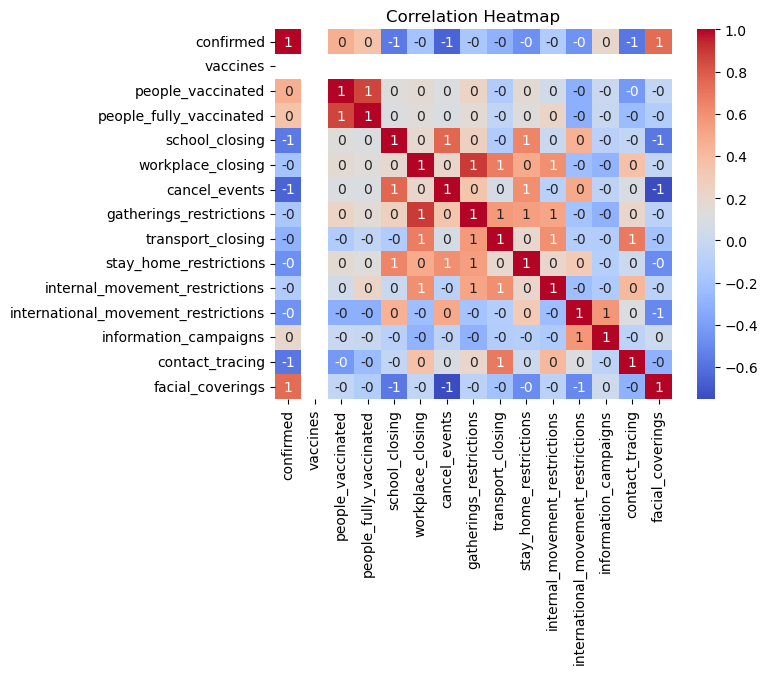

In [116]:
sns.heatmap(correlation_matrix,annot=True, cmap='coolwarm', fmt=".0f")
plt.title('Correlation Heatmap')
plt.show()

# Checking Data for measure of central tendency , skewness 


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'confirmed'),
  Text(1, 0, 'vaccines'),
  Text(2, 0, 'people_vaccinated'),
  Text(3, 0, 'people_fully_vaccinated'),
  Text(4, 0, 'school_closing'),
  Text(5, 0, 'workplace_closing'),
  Text(6, 0, 'cancel_events'),
  Text(7, 0, 'gatherings_restrictions'),
  Text(8, 0, 'transport_closing'),
  Text(9, 0, 'stay_home_restrictions'),
  Text(10, 0, 'internal_movement_restrictions'),
  Text(11, 0, 'international_movement_restrictions'),
  Text(12, 0, 'information_campaigns'),
  Text(13, 0, 'contact_tracing'),
  Text(14, 0, 'facial_coverings')])

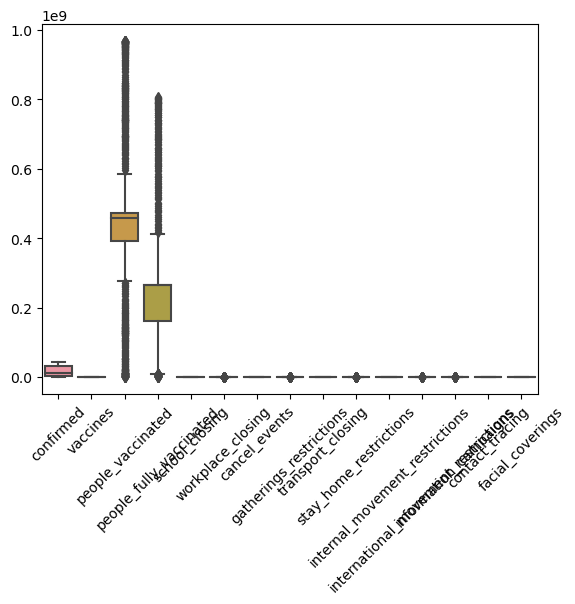

In [124]:
#outliers 
sns.boxplot(df1)
plt.xticks(rotation=45, fontsize=10) 

In [125]:
df1.describe()

,confirmed,vaccines,people_vaccinated,people_fully_vaccinated,school_closing,workplace_closing,cancel_events,gatherings_restrictions,transport_closing,stay_home_restrictions,internal_movement_restrictions,international_movement_restrictions,information_campaigns,contact_tracing,facial_coverings
count,7.790000e+02,779.0,7.790000e+02,7.790000e+02,779.000000,779.000000,779.000000,779.000000,779.000000,779.000000,779.000000,779.000000,779.000000,779.000000,779.000000
mean,1.697753e+07,0.0,4.567081e+08,2.639955e+08,-0.869340,-1.802341,-0.479844,-2.789133,-0.682705,-1.574772,-0.905072,2.962289,1.940182,1.433030,0.418726
std,1.463817e+07,0.0,2.489008e+08,1.838577e+08,2.417748,1.450980,1.806137,2.133895,1.327280,1.673915,1.506656,0.866327,0.251597,0.502949,3.622475
min,1.000000e+00,0.0,0.000000e+00,7.668000e+03,-3.000000,-3.000000,-2.000000,-4.000000,-2.000000,-3.000000,-2.000000,0.000000,0.000000,0.000000,-4.000000
25%,2.363138e+06,0.0,3.922099e+08,1.621278e+08,-3.000000,-3.000000,-2.000000,-4.000000,-2.000000,-3.000000,-2.000000,2.962289,2.000000,1.000000,-4.000000
50%,1.101643e+07,0.0,4.567081e+08,2.639955e+08,-2.000000,-2.000000,-2.000000,-4.000000,0.000000,-2.000000,-2.000000,3.000000,2.000000,1.000000,2.000000
75%,3.267249e+07,0.0,4.720948e+08,2.639955e+08,3.000000,-2.000000,2.000000,-2.000000,0.000000,-2.000000,0.000000,4.000000,2.000000,2.000000,4.000000
max,4.298426e+07,0.0,9.679468e+08,8.058866e+08,3.000000,3.000000,2.000000,4.000000,2.000000,3.000000,2.000000,4.000000,2.000000,2.000000,4.000000


In [126]:
df1.skew()

C:\Users\Hp\AppData\Local\Temp\ipykernel_9476\149261804.py:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df1.skew()


confirmed                              0.306760
vaccines                               0.000000
people_vaccinated                      0.102849
people_fully_vaccinated                1.081357
school_closing                         0.790231
workplace_closing                      1.681808
cancel_events                          0.502047
gatherings_restrictions                2.002428
transport_closing                      0.331115
stay_home_restrictions                 1.722937
internal_movement_restrictions         0.877681
international_movement_restrictions   -0.675643
information_campaigns                 -4.450021
contact_tracing                        0.150874
facial_coverings                      -0.259139
dtype: float64

In [127]:
df1.kurt()

C:\Users\Hp\AppData\Local\Temp\ipykernel_9476\3055152066.py:1: FutureWarning: The default value of numeric_only in DataFrame.kurt is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df1.kurt()


confirmed                              -1.482659
vaccines                                0.000000
people_vaccinated                      -0.210843
people_fully_vaccinated                 1.360811
school_closing                         -1.083420
workplace_closing                       2.621057
cancel_events                          -1.608178
gatherings_restrictions                 3.274910
transport_closing                      -1.256244
stay_home_restrictions                  1.817490
internal_movement_restrictions         -0.857629
international_movement_restrictions     0.163137
information_campaigns                  20.836030
contact_tracing                        -1.660561
facial_coverings                       -1.760390
dtype: float64

C:\Users\Hp\AppData\Local\Temp\ipykernel_9476\4079203998.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df1.mean().plot(kind='bar')


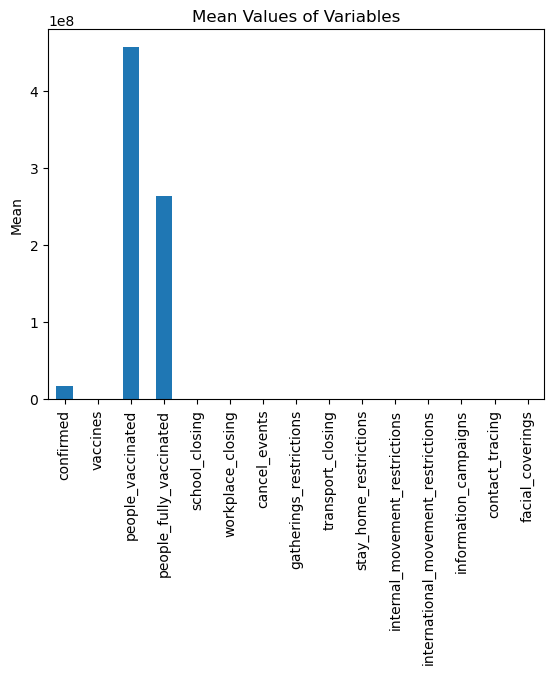

In [129]:
df1.mean().plot(kind='bar')
plt.title('Mean Values of Variables')
plt.ylabel('Mean')
plt.show()

# Conclusion:

# 1. How variables are correlated to each other using heatmap and corr() ?

#Outliers are mostly in people_vaccinated and people_vaccinated_fully